In [554]:
import pandas as pd
import numpy as np
import os
from pandas import Series, DataFrame
import glob

#used glob as to combine csv files by year
glob.glob('data_euros/data_euros*.csv')
all_dfs = []
for one_filename in glob.glob('data_euros/data_euros*.csv'):
    #print (f'Loading[={one_filename}')
    new_df = pd.read_csv(one_filename,
            usecols=['home_score', 'away_score', 'match_attendance'])
    all_dfs.append(new_df)

In [550]:
len(all_dfs)

17

In [529]:
df = pd.concat(all_dfs)

In [ ]:
import pandas as pd
import numpy as np
import glob
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
#tensorflow
# Step 1: Load and concatenate DataFrames from multiple CSV files
all_dfs = []
for filename in glob.glob('data_euros/data_euros*.csv'):
    df = pd.read_csv(filename)
    all_dfs.append(df)

df = pd.concat(all_dfs, ignore_index=True)

# Step 2: Handle NaN values (if any)
df.dropna(subset=['winner'], inplace=True)  # Drop rows where 'winner' is NaN

# Step 3: One-hot encode the target variable 'winner'
encoder = OneHotEncoder(sparse=False)
winner_encoded = encoder.fit_transform(df[['winner']])
columns = encoder.categories_[0]

# Append the one-hot encoded columns to the dataframe
df_encoded = pd.concat([df, pd.DataFrame(winner_encoded, columns=columns)], axis=1)

# Step 4: Separate Features (X) and Target Variables (y)
X = df_encoded[['home_score', 'away_score', 'match_attendance', 'stadium_capacity', 'year']]

# Select the one-hot encoded columns as y
y = df_encoded[columns]

# Step 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Normalize the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Build the TensorFlow model
model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),  #Define input shape
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(len(columns), activation='softmax')  #Output layer matches the number of unique classes
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#Train model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test))

#Evaluate model
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {accuracy}")

#Predictions
predictions = model.predict(X_test_scaled)

In [ ]:
print(X_train_scaled.dtype)
print(y_train.dtype)

In [ ]:
# Assuming df is your DataFrame containing the data
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

print("Categorical columns:")
print(categorical_columns)


In [451]:
# Initialize and train RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [457]:
# Predict on the test set
y_pred = rf_regressor.predict(X_test_scaled)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 1.2505120414287887
R-squared: -0.06282483097302616


Loading data_euros/data_euros_2024.csv
Loading data_euros/data_euros_2008.csv
Loading data_euros/data_euros_2020.csv
Loading data_euros/data_euros_1980.csv
Loading data_euros/data_euros_1996.csv
Loading data_euros/data_euros_1968.csv
Loading data_euros/data_euros_1992.csv
Loading data_euros/data_euros_1984.csv
Loading data_euros/data_euros_1988.csv
Loading data_euros/data_euros_1976.csv
Loading data_euros/data_euros_1960.csv
Loading data_euros/data_euros_1964.csv
Loading data_euros/data_euros_1972.csv
Loading data_euros/data_euros_2004.csv
Loading data_euros/data_euros_2012.csv
Loading data_euros/data_euros_2016.csv
Loading data_euros/data_euros_2000.csv
Accuracy: 0.65
                     precision    recall  f1-score   support

            Belgium       1.00      1.00      1.00         1
            Croatia       1.00      0.50      0.67         2
            Czechia       0.50      1.00      0.67         1
            Denmark       1.00      1.00      1.00         1
            Engl

/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best parameters found:
{'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy with best estimator: 0.65


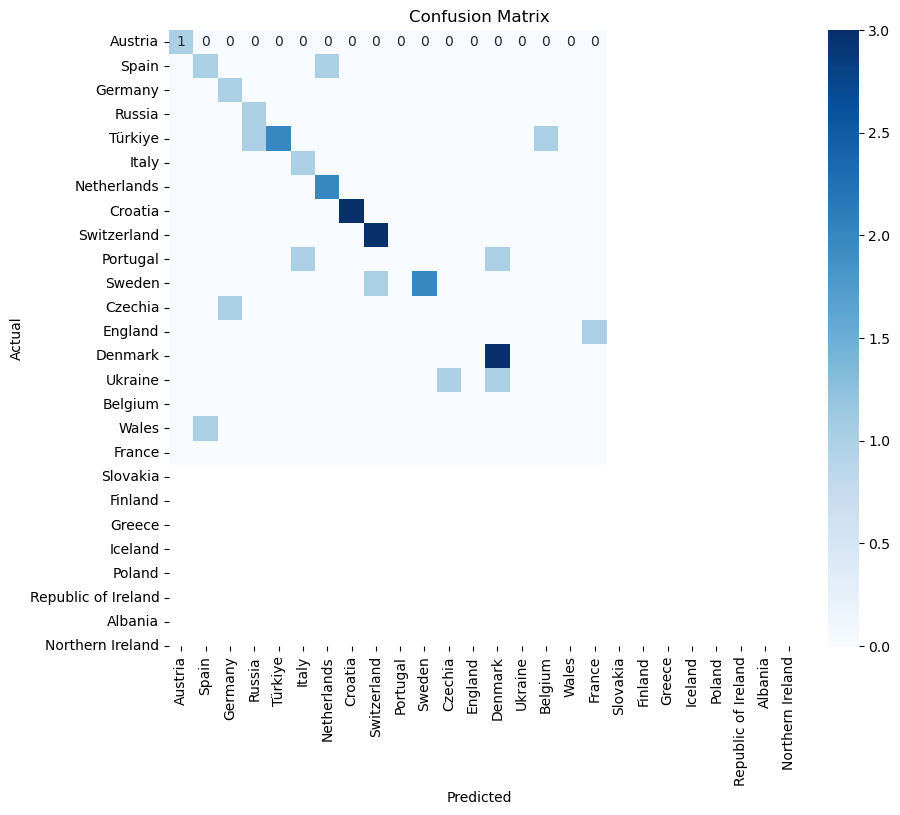

<function matplotlib.pyplot.figure(num: 'int | str | Figure | SubFigure | None' = None, figsize: 'tuple[float, float] | None' = None, dpi: 'float | None' = None, *, facecolor: 'ColorType | None' = None, edgecolor: 'ColorType | None' = None, frameon: 'bool' = True, FigureClass: 'type[Figure]' = <class 'matplotlib.figure.Figure'>, clear: 'bool' = False, **kwargs) -> 'Figure'>

In [14]:
import pandas as pd
import glob
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load and concatenate DataFrames from multiple CSV files
all_dfs = []
for one_filename in glob.glob('data_euros/data_euros*.csv'):
    print(f'Loading {one_filename}')
    new_df = pd.read_csv(one_filename)
    all_dfs.append(new_df)

# Concatenate all DataFrames into one
df = pd.concat(all_dfs, ignore_index=True)

# Step 2: Select relevant features and target variable
features = ['home_team', 'away_team', 'home_score', 'away_score', 'match_attendance', 'stadium_capacity', 'condition_weather', 'stadium_name']
target = 'winner'

df = df[features + [target]].dropna()  # Ensure only rows with complete data for selected features are used

# Step 3: Encode categorical variables
df = pd.get_dummies(df, columns=['home_team', 'away_team', 'condition_weather', 'stadium_name'])

# Step 4: Split data into training and testing sets
X = df.drop(columns=[target])
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict on the test set and evaluate the model
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print(classification_report(y_test, y_pred, zero_division=0))

# Parameter tuning with GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy')

grid_search.fit(X_train, y_train)

best_estimator = grid_search.best_estimator_
print("Best parameters found:")
print(grid_search.best_params_)

# Use the best estimator for predictions
y_pred_grid = best_estimator.predict(X_test)
accuracy_grid = accuracy_score(y_test, y_pred_grid)
print(f'Accuracy with best estimator: {accuracy_grid:.2f}')

# Plot confusion matrix
conf_mat = confusion_matrix(y_test, y_pred_grid)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=y.unique(), yticklabels=y.unique())
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Plot feature importances
importances = best_estimator.feature_importances_
features = X.columns

# Sort feature importances in descending order
indices = importances.argsort()[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [features[i] for i in indices]

plt.figure


In [16]:
print(y.value_counts())


winner
Spain                  16
Italy                  15
Germany                12
Portugal               10
England                10
Czechia                 9
France                  9
Netherlands             8
Croatia                 7
Belgium                 7
Sweden                  5
Russia                  5
Wales                   5
Denmark                 5
Switzerland             4
Türkiye                 4
Greece                  3
Poland                  3
Austria                 3
Ukraine                 3
Slovakia                2
Iceland                 2
Finland                 1
Republic of Ireland     1
Albania                 1
Northern Ireland        1
Name: count, dtype: int64
